In [1]:
libname stat2131 "";
run;

SAS Connection established. Subprocess id is 8047



In [2]:
data pg_steam;
 set stat2131.pg_steam;
run;


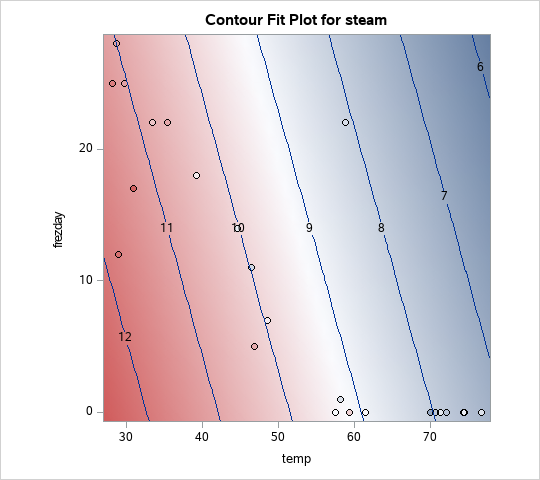

In [4]:
*ESS;
proc glm data=pg_steam;
model steam = temp frezday;
run;

In [5]:
proc glm data=pg_steam;
model steam = temp glycerin frezday;
run;

In [6]:
*Lack of fit test;
data pg_steam2;
  set pg_steam;
  month2 = (month=2);
  month3 = (month=3);
  month4 = (month=4);
  month5 = (month=5);
  month6 = (month=6);
  month7 = (month=7);
  month8 = (month=8);
  month9 = (month=9);
  month10 = (month=10);
  month11 = (month=11);
  month12 = (month=12);
run;

In [7]:
proc print data=pg_steam2 (obs=10);
run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4,0,0,0,0,0,0,0,0,0,0,0
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5,1,0,0,0,0,0,0,0,0,0,0
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4,0,1,0,0,0,0,0,0,0,0,0
4,4,4,8.40,3.89,0.49,7.5,30,20,22,58.8,4,0,0,1,0,0,0,0,0,0,0,0
5,5,5,9.27,6.28,0.84,5.5,31,21,0,61.4,5,0,0,0,1,0,0,0,0,0,0,0
6,6,6,8.73,5.76,0.74,8.9,30,22,0,71.3,4,0,0,0,0,1,0,0,0,0,0,0
7,7,7,6.36,3.45,0.42,4.1,31,11,0,74.4,2,0,0,0,0,0,1,0,0,0,0,0
8,8,8,8.50,6.57,0.87,4.1,31,23,0,76.7,5,0,0,0,0,0,0,1,0,0,0,0
9,9,9,7.82,5.69,0.75,4.1,30,21,0,70.7,4,0,0,0,0,0,0,0,1,0,0,0
10,10,10,9.14,6.14,0.76,4.5,31,20,0,57.5,5,0,0,0,0,0,0,0,0,1,0,0



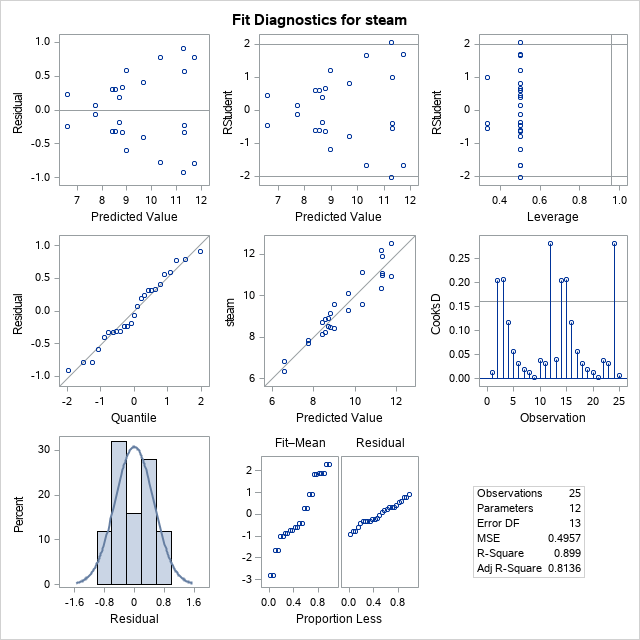
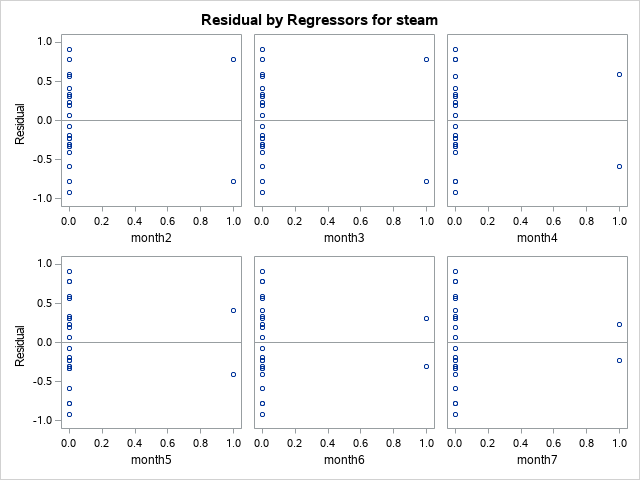
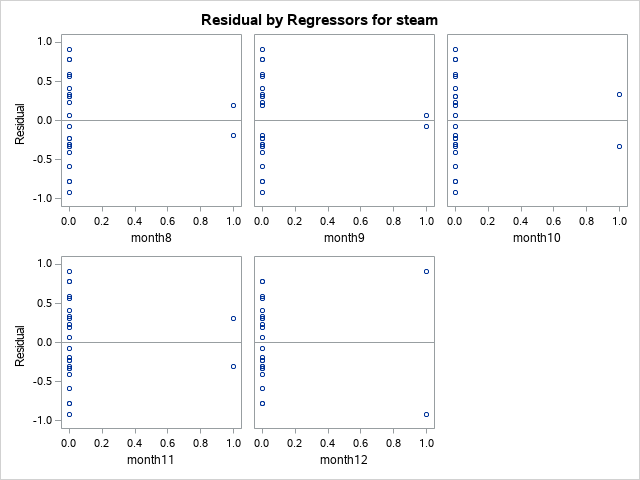
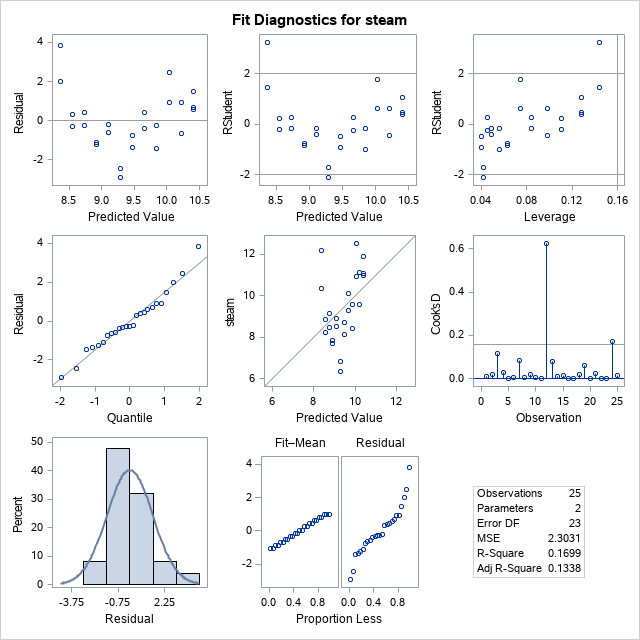
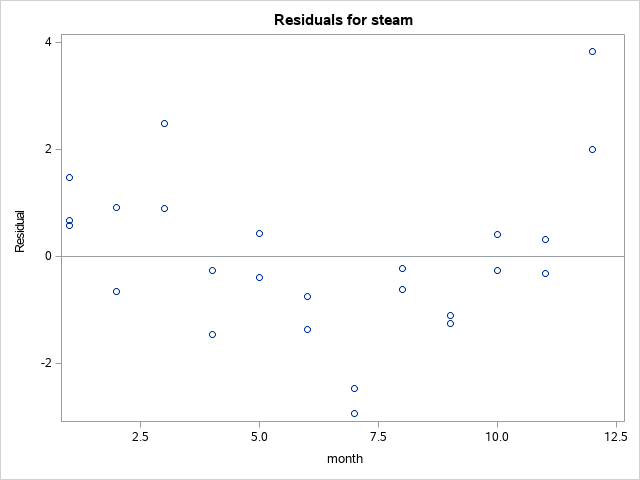
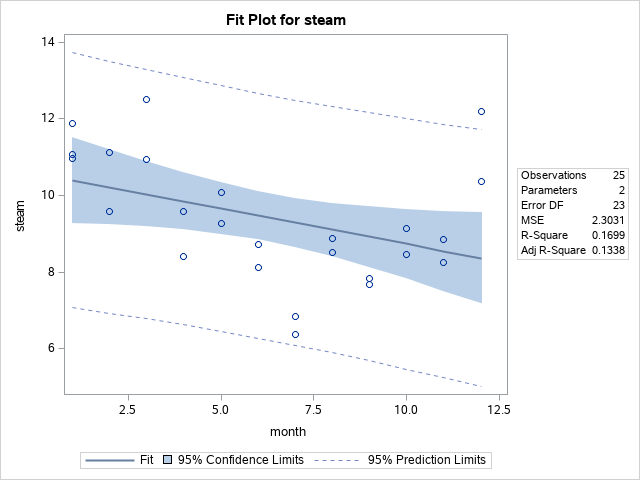

In [8]:
* saturated model;
proc reg data=pg_steam2;
  model steam = month2 month3 month4 month5 month6 month7 month8 month9 month10 month11 month12;
run;
* reduced model;
proc reg data=pg_steam2;
  model steam = month;
run;


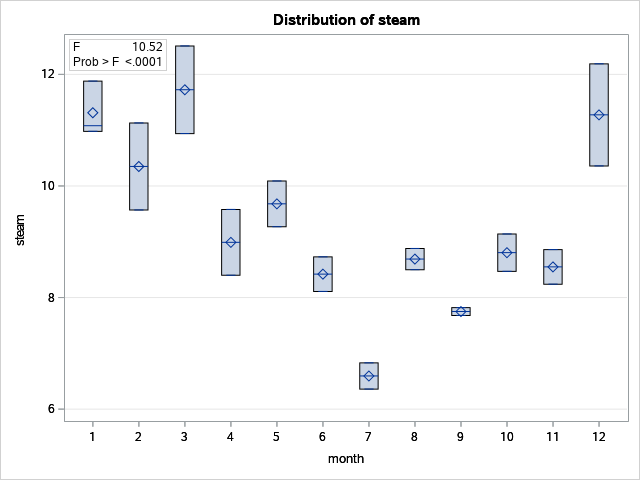

In [10]:
proc glm data=pg_steam2;
  class month;
  model steam = month /solution;
run;


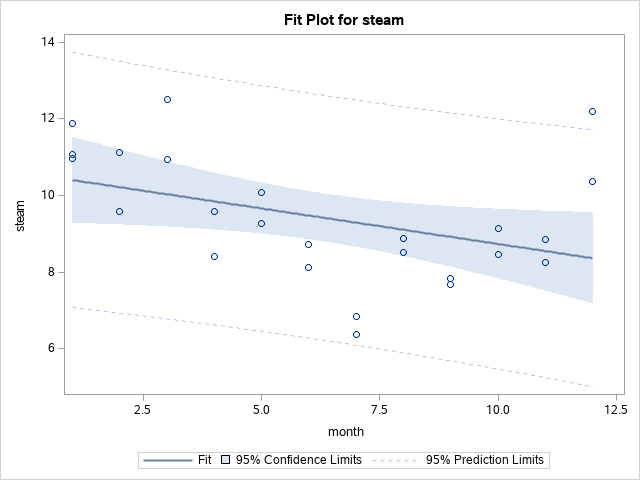

In [11]:
proc glm data=pg_steam2;
  model steam = month; *take as quantitive;
run;


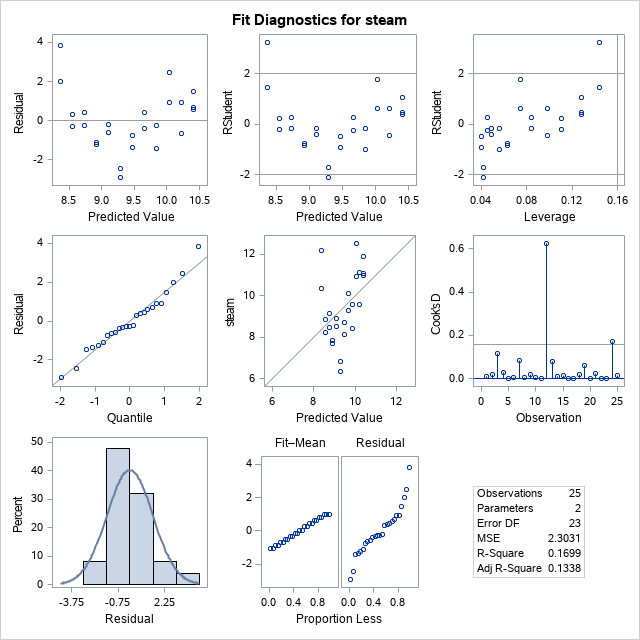
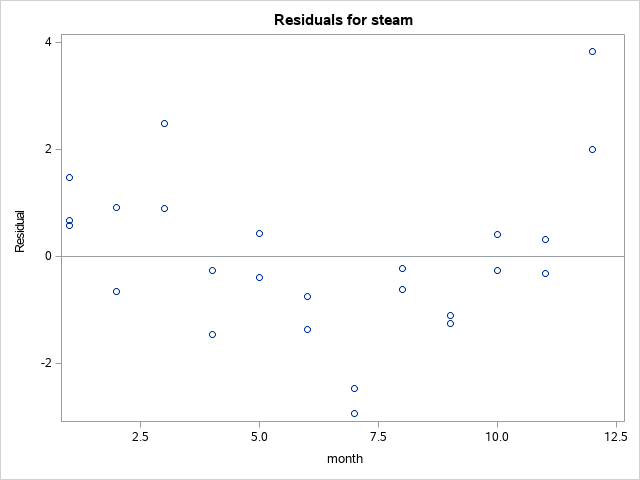
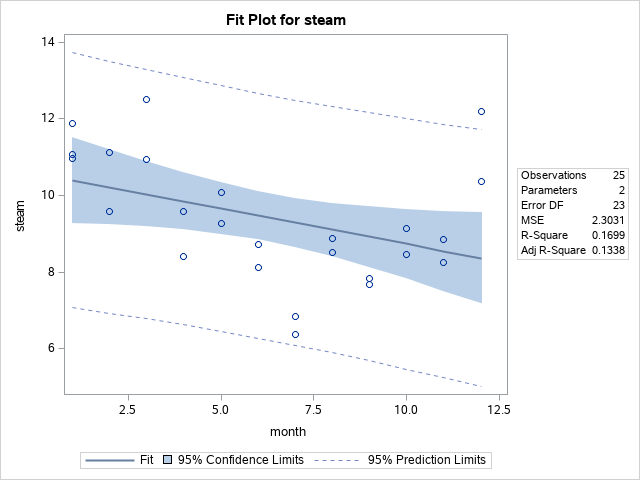

In [12]:
*method2:lack of fit;
proc reg data=pg_steam2;
  model steam = month/lackfit;
run;

In [13]:
/* Lack-of-fit test example 2 */
data hiv;
input fat num years;
datalines;
    0.2985    6.0000    5.0000
    0.1938    5.0000    5.0000
    0.0542    4.0000         0
    0.1654    5.0000    5.0000
    0.0334    5.0000         0
    0.2164    8.0000    5.0000
    0.1487    1.0000   10.0000
    0.1404         0   10.0000
    0.4721    6.0000   10.0000
    1.0000   13.0000   10.0000
    0.5000   14.0000    5.0000
    0.0271    3.0000    5.0000
    0.1693    2.0000   10.0000
    0.1343   13.0000         0
    0.2958    3.0000   10.0000
    0.7002    9.0000   10.0000
    0.5899   14.0000    5.0000
    0.8927   13.0000   10.0000
    0.0169         0    5.0000
    0.1814    2.0000   10.0000
    0.4572   12.0000    5.0000
    0.5771    6.0000   10.0000
    0.0719   13.0000         0
    0.5034   11.0000    5.0000
    0.0173   10.0000         0
    0.4281    5.0000   10.0000
    0.0808    2.0000    5.0000
    0.2730    2.0000   10.0000
    0.2897    6.0000    5.0000
    0.5057   12.0000    5.0000
    0.2921    7.0000    5.0000
    0.5183   12.0000    5.0000
    0.3940    6.0000    5.0000
    0.0641    6.0000         0
    0.4897    6.0000   10.0000
    0.5425    6.0000   10.0000
    0.9327   13.0000   10.0000
    0.0509         0   10.0000
    0.3926    4.0000   10.0000
    0.0413   10.0000         0
    0.4377    9.0000    5.0000
    0.6423   14.0000    5.0000
    0.0158    8.0000         0
    0.0401    6.0000         0
    0.4038    9.0000    5.0000
    0.2985   11.0000    5.0000
    0.4841    5.0000   10.0000
    0.0695         0    5.0000
    0.0491    6.0000         0
    0.5026   11.0000    5.0000
    0.4177   11.0000    5.0000
    0.0665   13.0000         0
    0.7943   12.0000   10.0000
    0.3328    5.0000   10.0000
    0.3248    9.0000    5.0000
    0.0730   10.0000         0
    0.2086    2.0000   10.0000
    0.4258   13.0000    5.0000
    0.6770    8.0000   10.0000
    0.0107    9.0000         0
    0.1590    3.0000    5.0000
    0.3307    8.0000    5.0000
    0.0599   13.0000         0
    0.4503    5.0000   10.0000
    0.6635    9.0000   10.0000
    0.1332    5.0000    5.0000
    0.6199    9.0000   10.0000
    0.0709   10.0000         0
    0.3560    5.0000   10.0000
    0.4706    6.0000   10.0000
    0.3113    9.0000    5.0000
    0.4006   12.0000    5.0000
    0.3694    5.0000   10.0000
    0.2394    6.0000    5.0000
    0.0555    8.0000         0
    0.3241    8.0000    5.0000
    0.1177   10.0000         0
    0.2825    7.0000    5.0000
    0.3468   11.0000    5.0000
    0.2971    7.0000    5.0000
    0.1295    2.0000    5.0000
    0.0751   10.0000         0
    0.1083   14.0000         0
    0.5405   12.0000    5.0000
    0.0258   10.0000         0
    0.3114    7.0000    5.0000
    0.0050    1.0000         0
    0.3319    9.0000    5.0000
    0.3499    5.0000    5.0000
    0.1108    2.0000    5.0000
    0.2504    8.0000    5.0000
    0.9677   12.0000   10.0000
    0.4177   10.0000    5.0000
    0.4722   14.0000    5.0000
    0.1152   14.0000         0
    0.1294         0    5.0000
;
run;


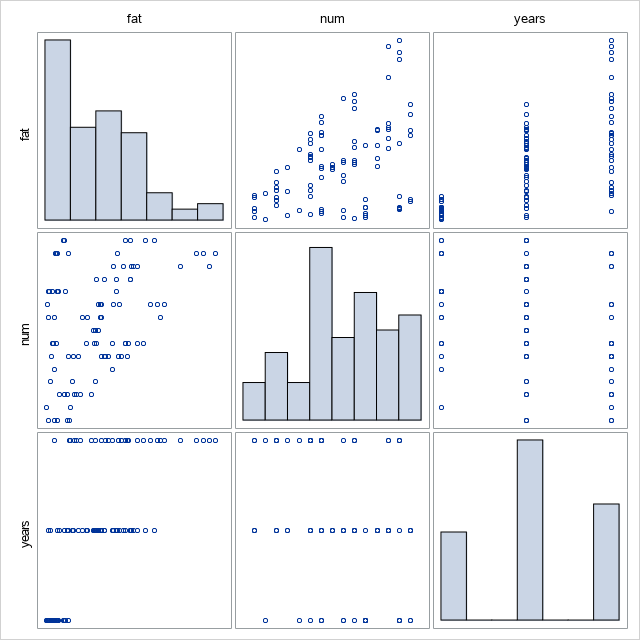

In [14]:
data hiv;
set hiv;
fat = fat*100;
numyr = num*years;
run;

PROC SGSCATTER data=hiv; 
MATRIX fat num years /DIAGONAL = (HISTOGRAM); 
RUN;


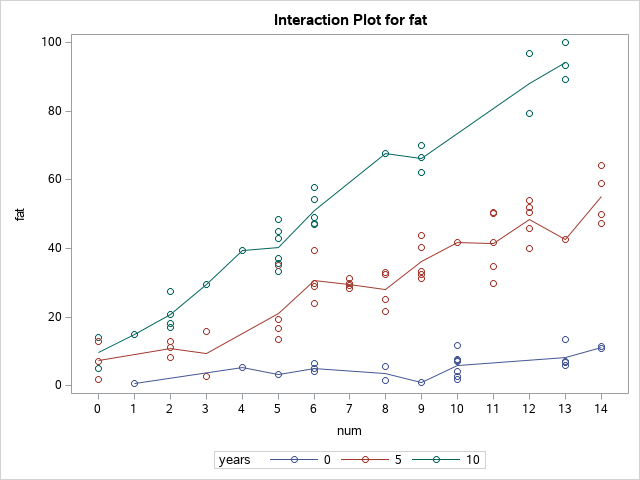
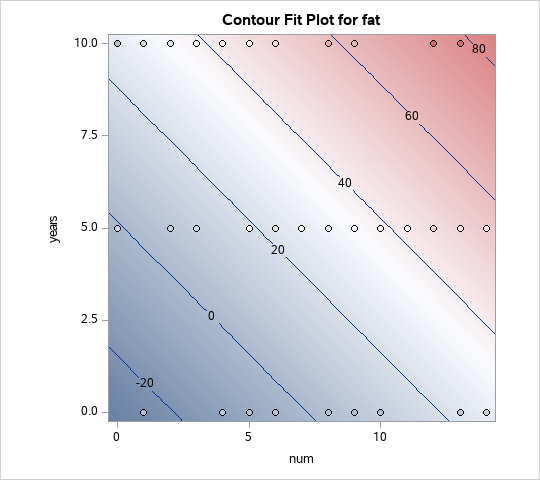
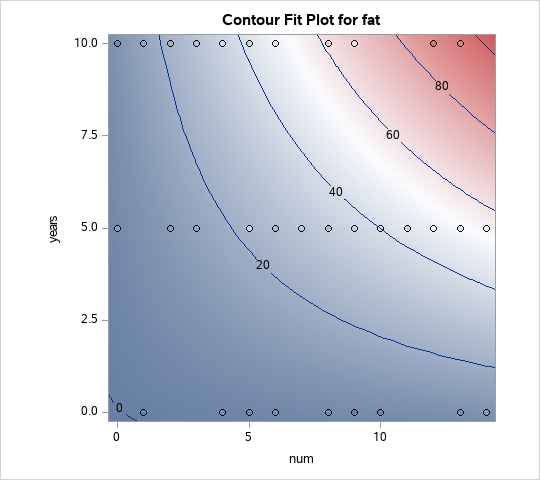

In [15]:
* method 1: fit both saturated model and linear model and construct F test "by hand";

proc glm data=hiv; class num years; model fat = num*years; run;

proc glm data=hiv; model fat = num years; run;

proc glm data=hiv; model fat = num years num*years; run;


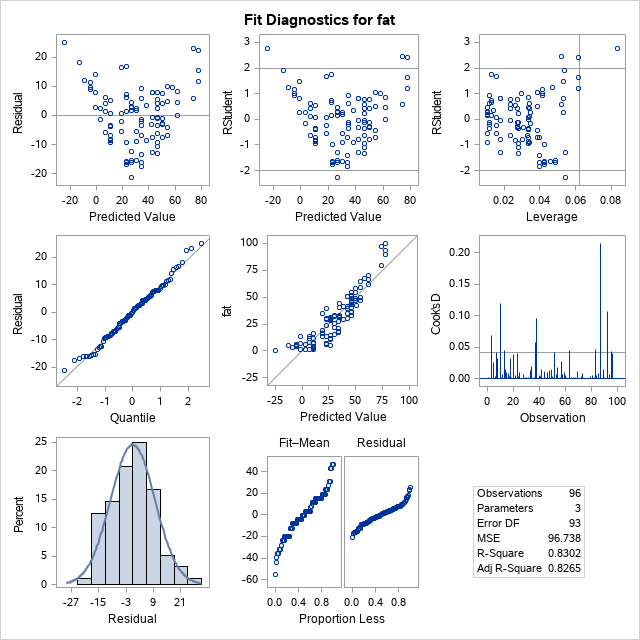
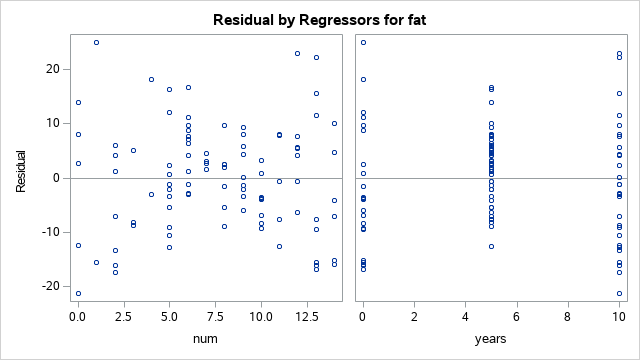

In [16]:
* method 2;
proc reg data=hiv;
model fat = num years/lackoffit;
run; quit;


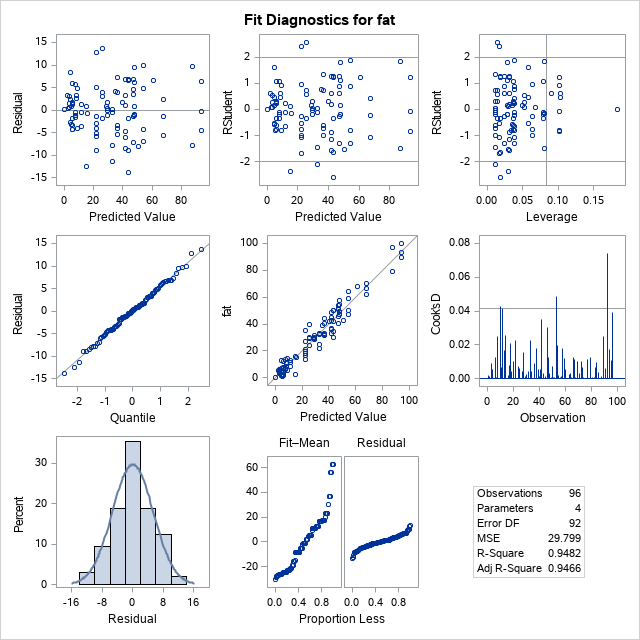
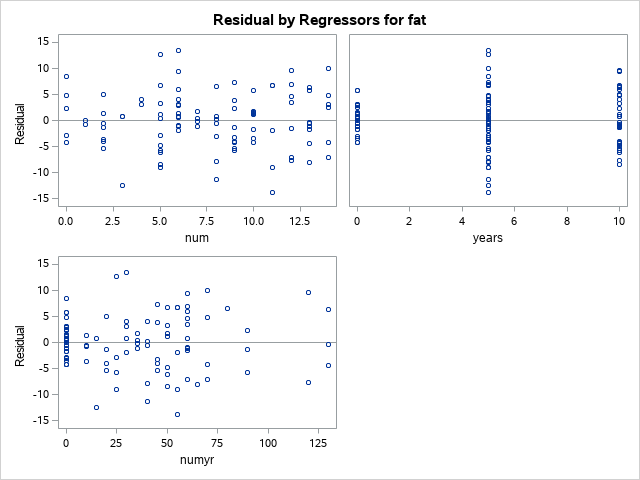

In [17]:
proc reg data=hiv;
model fat = num years numyr /lackoffit;
run; quit;


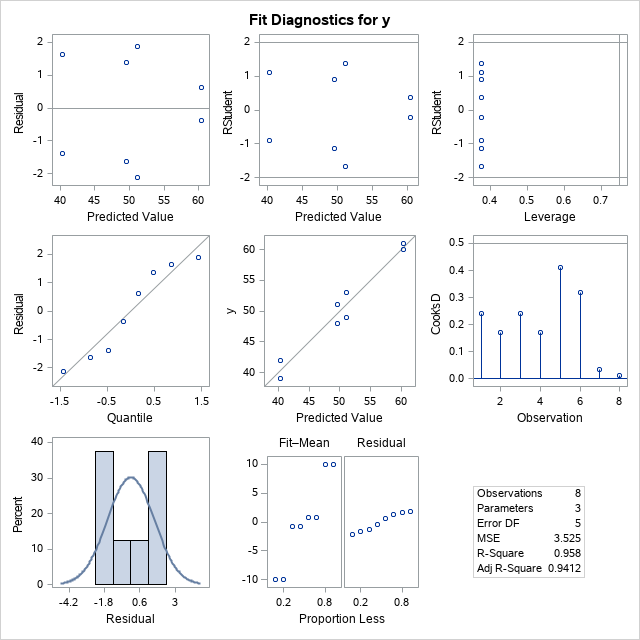
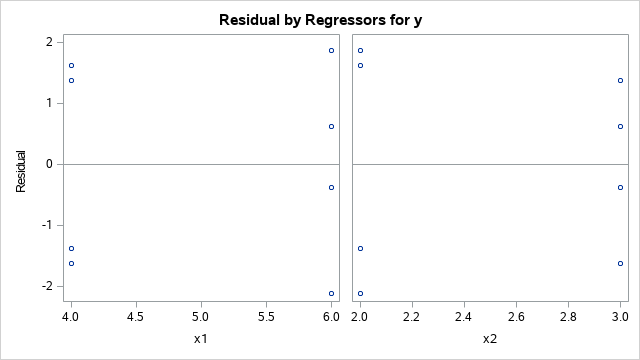
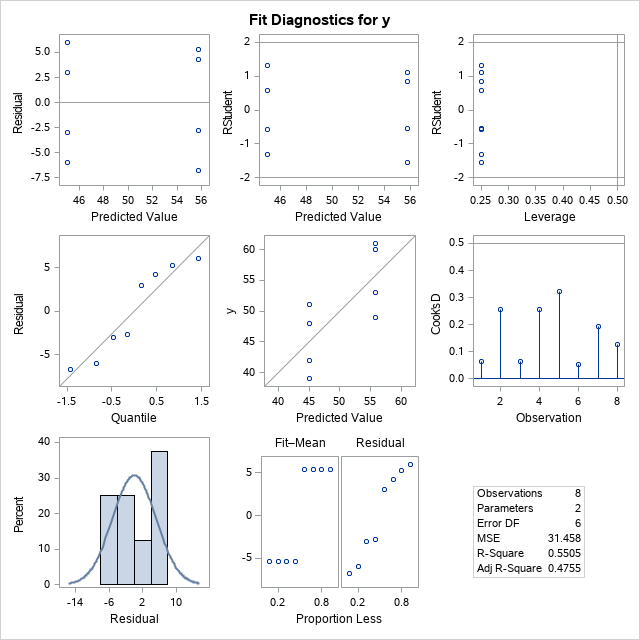
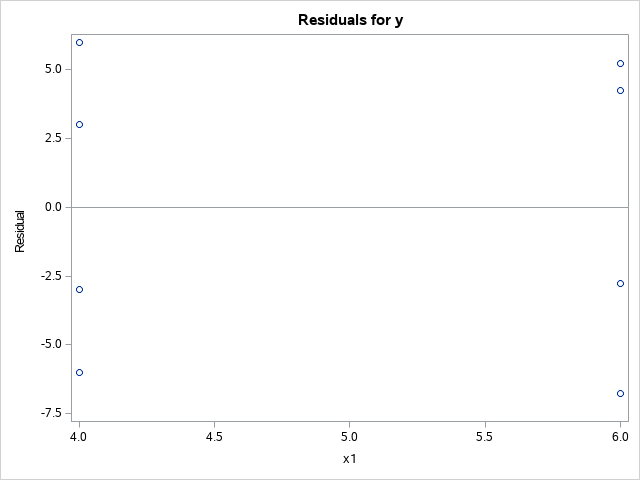
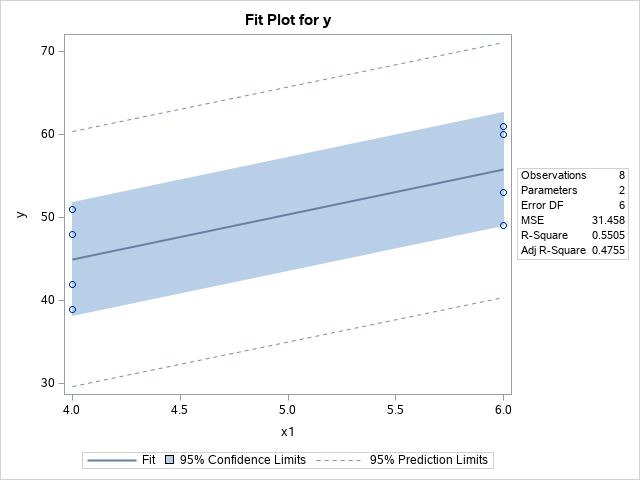
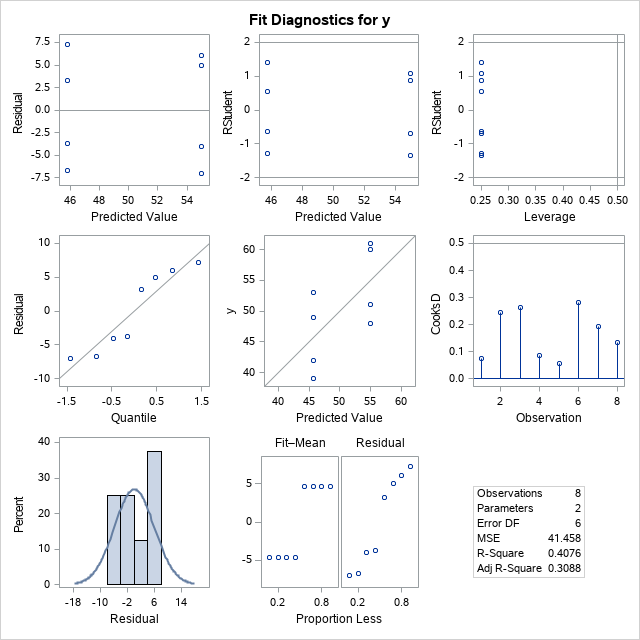
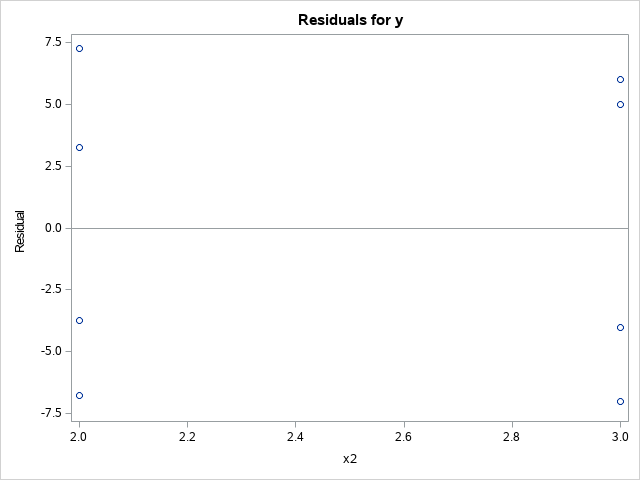
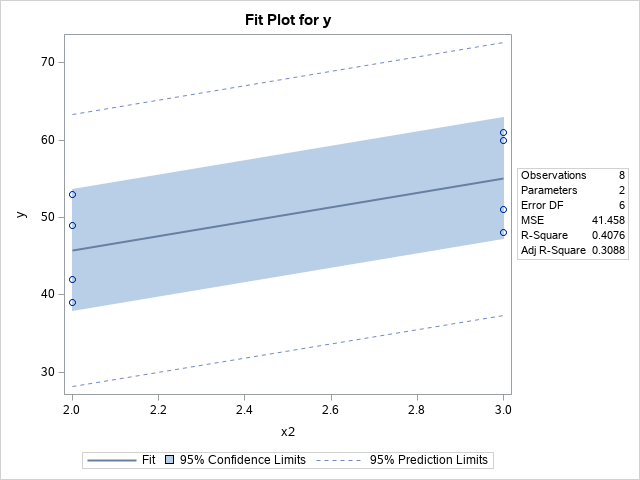

In [18]:
/* uncorrelated predictors */
data crew;
  input x1 x2 y;
datalines;
  4  2  42
  4  2  39
  4  3  48
  4  3  51
  6  2  49
  6  2  53
  6  3  61
  6  3  60
;
run;
proc reg data = crew;
  model y = x1 x2;
  model y = x1;
  model y = x2;
run; quit;


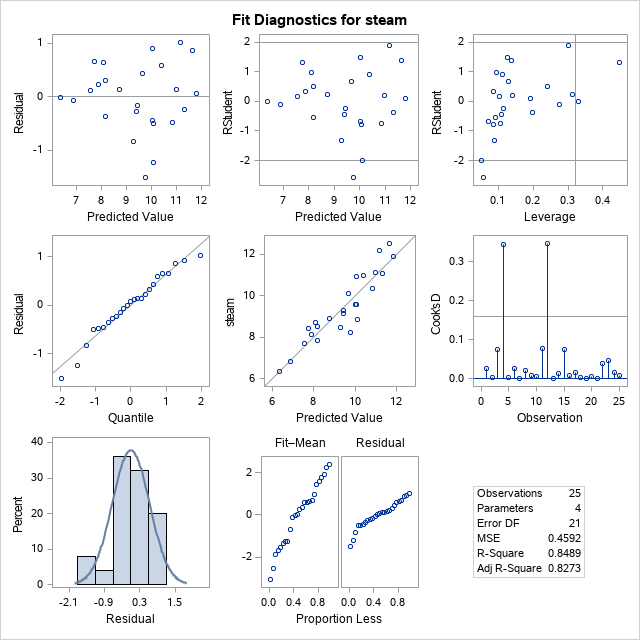
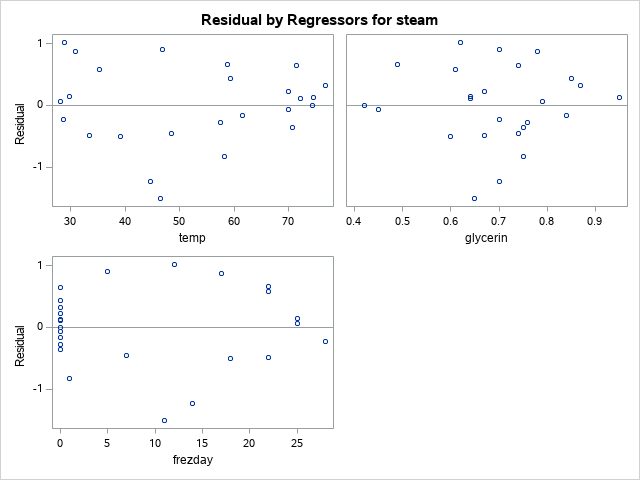

In [20]:
*Multicolinearity;
proc reg data=pg_steam;
model steam = temp glycerin frezday / stb;
run;


In [21]:
proc corr data=pg_steam;
var temp frezday;
run;
